**Тема “Обучение без учителя”**

Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [4]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [11]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

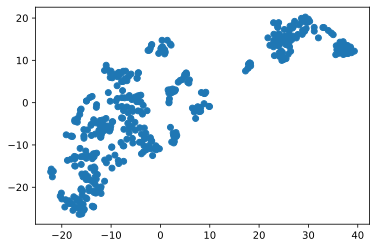

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [15]:
# labels_train = kmeans.fit_predict(X_train_scaled)
labels_train = kmeans.fit_predict(X_train)
pd.value_counts(labels_train)

0    297
2     76
1     31
dtype: int64

In [16]:
# X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne = tsne.fit_transform(X_train)

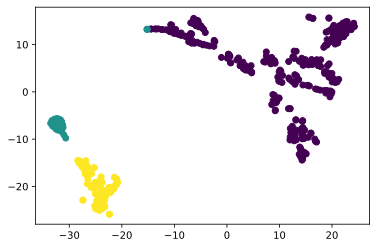

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [18]:
y_train.loc[labels_train==0, 'price'].mean()

25.168686868686873

In [19]:
y_train.loc[labels_train==1, 'price'].mean()

13.196774193548386

In [20]:
y_train.loc[labels_train==2, 'price'].mean()

17.4421052631579

In [21]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.40486282828282844

In [22]:
X_train.loc[labels_train==1, 'CRIM'].mean()

14.360380322580648

In [23]:
X_train.loc[labels_train==2, 'CRIM'].mean()

11.745661842105266

*Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [24]:
labels_test = kmeans.predict(X_test)
pd.value_counts(labels_test)

0    69
2    26
1     7
dtype: int64

In [25]:
X_test_tsne = tsne.fit_transform(X_test)

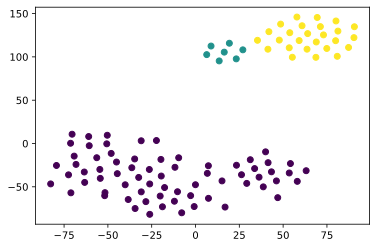

In [26]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [27]:
y_test.loc[labels_test==0, 'price'].mean()

23.911594202898552

In [28]:
y_test.loc[labels_test==1, 'price'].mean()

12.814285714285713

In [29]:
y_test.loc[labels_test==2, 'price'].mean()

17.39230769230769

In [30]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.2464211594202899

In [31]:
X_test.loc[labels_test==1, 'CRIM'].mean()

19.021665714285714

In [32]:
X_test.loc[labels_test==2, 'CRIM'].mean()

8.469301923076923